# Informe de selección de Zonas Aptas para la instalación de estaciones meteorológicas basados en históricos climáticos y Catálogo Nacional de Estaciones del IDEAM en municipios de la provincia de Vélez.
___

Autor: Esneyder Alonso Ortiz Vargas, Jhan Carlos Holguín Mosquera

## Introducción
___

El proyecto de investigación *Optimizando la Agricultura: Redes de Sensores, GPS y Tecnologías Avanzadas para Decisiones Agrícolas Basadas en Información Precisa* tiene como objetivo principal implementar una infraestructura de sensores y dispositivos IoT en campos agrícolas seleccionados de la provincia de Vélez, Santander, con el fin de recopilar datos climáticos, edáficos y agrícolas de alta precisión. Esta iniciativa busca proporcionar información precisa y en tiempo real que facilite la toma de decisiones en la gestión de cultivos y unidades productivas, adaptándose a las condiciones climáticas cambiantes y fenómenos como el cambio climático y La Niña.

Para alcanzar este objetivo, es crucial la instalación de estaciones meteorológicas en puntos estratégicos de la provincia. La identificación de las zonas aptas para la instalación de estas estaciones se basa en el análisis de dos parámetros principales: los históricos de datos climáticos obtenidos de la plataforma NAPA POWER y el Catálogo Nacional de Estaciones del IDEAM. Este análisis permitirá identificar áreas que no cuentan con estaciones meteorológicas y zonas con variabilidad climática significativa, asegurando una cobertura adecuada y la recolección de datos representativos de las diferentes condiciones climáticas locales.

El presente informe tiene como propósito detallar el proceso de identificación de las zonas óptimas para la instalación de estaciones meteorológicas, proporcionando una base sólida para la implementación de la infraestructura tecnológica necesaria para el proyecto.

## Objetivos
___

### Objetivo General:

Identificar las zonas aptas para la instalación de estaciones meteorológicas en la provincia de Vélez, Santander, Colombia, utilizando datos históricos de la plataforma NAPA POWER y el Catálogo Nacional de Estaciones del IDEAM, para asegurar una cobertura adecuada y la recopilación de datos climáticos precisos y representativos.

## Objetivos Específicos:

* Analizar los datos históricos climáticos de la plataforma NAPA POWER.
* Consultar el Catálogo Nacional de Estaciones del IDEAM.
* Seleccionar puntos estratégicos para la instalación de nuevas estaciones meteorológicas.
* Elaborar un plan de implementación para la instalación de las estaciones meteorológicas.



## Prólogo

Para llevar a cabo este análisis exhaustivo de identificación de zonas aptas para la instalación de estaciones meteorológicas en la provincia de Vélez, Santander, nos valdremos de las capacidades y flexibilidad que ofrece el lenguaje de programación Python. Python nos permite acceder, procesar y analizar grandes volúmenes de datos de manera eficiente y efectiva. Utilizaremos bibliotecas especializadas como pandas, NumPy y matplotlib para manipular y visualizar los datos climáticos históricos provenientes de la plataforma NAPA POWER y el Catálogo Nacional de Estaciones del IDEAM. Además, el uso de herramientas como Jupyter Notebooks facilitará la organización y documentación del proceso de análisis, permitiéndonos compartir de manera clara y transparente los resultados obtenidos. Python se erige así como una poderosa herramienta que nos guiará en la identificación de las áreas óptimas para la instalación de las estaciones meteorológicas, brindando una base sólida para la toma de decisiones en este proyecto de investigación.

## Importación de Librerias

In [21]:
import pandas as pd
import requests
import folium
from folium import Marker
import matplotlib.pyplot as plt

## 1. Consultar el Catálogo Nacional de Estaciones del IDEAM.

In [22]:
# Definir la URL de la API
url = "https://www.datos.gov.co/resource/hp9r-jxuu.json"

# Enviar la solicitud GET a la API y almacenar la respuesta
respuesta = requests.get(url)

# Verificar si la solicitud fue exitosa
if respuesta.status_code == 200:
  # Convertir la respuesta JSON a un objeto de Python
  datos = respuesta.json()
else:
  # Manejar el error en caso de que la solicitud no sea exitosa
  print("Error:", respuesta.status_code)
    
    
# Crear un DataFrame a partir de la lista de diccionarios
df = pd.DataFrame(datos)

# Mostrar las primeras 5 filas del DataFrame
df.head()

,codigo,nombre,categoria,tecnologia,estado,departamento,municipio,ubicaci_n,altitud,fecha_instalacion,area_operativa,corriente,area_hidrografica,zona_hidrografica,subzona_hidrografica,entidad,fecha_suspension
0,52057100,RUMICHACA - AUT [52057100],Limnigráfica,Automática con Telemetría,Activa,Nariño,Ipiales,"{'latitude': '0.81378611', 'longitude': '-77.6...",2582,2016-11-15,Area Operativa 07 - Nariño-Putumayo,Guaitara,Pacifico,Patía,Río Guáitara,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaN
1,52055170,LA JOSEFINA - AUT [52055170],Climática Principal,Automática con Telemetría,Activa,Nariño,Contadero,"{'latitude': '0.93030556', 'longitude': '-77.4...",2450,2005-12-10,Area Operativa 07 - Nariño-Putumayo,Guaitara,Pacifico,Patía,Río Guáitara,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaN
2,52055220,EL PARAISO - AUT [52055220],Climática Principal,Automática con Telemetría,Activa,Nariño,Túquerres,"{'latitude': '1.07061111', 'longitude': '-77.6...",3120,2004-03-01,Area Operativa 07 - Nariño-Putumayo,Guaitara,Pacifico,Patía,Río Guáitara,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaN
3,44015070,EL PEPINO - AUT [44015070],Climática Principal,Automática con Telemetría,Activa,Putumayo,Mocoa,"{'latitude': '1.08288889', 'longitude': '-76.6...",760,2005-11-11,Area Operativa 07 - Nariño-Putumayo,Guaitara,Amazonas,Caquetá,Alto Caqueta,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaN
4,48015040,PUERTO NARINO - AUT [48015040],Climática Principal,Automática con Telemetría,Activa,Amazonas,Puerto Nariño,"{'latitude': '-3.78030556', 'longitude': '-70....",158,2005-07-19,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Amazonas,Amazonas,Amazonas - Directos,Directos Río Amazonas (mi),INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaN


Se realiza un primer análisis del **Catálogo Nacional de Estaciones del IDEAM** el cual es accesible desde su API publicada en la plataforma gubernamental de Datos Abiertos. Este catálogo relaciona la información de las estaciones hidrometeorológicas de propiedad del IDEAM y de otras entidades, con fecha de última actualización del 20 de abril del 2024. 

### 1.1. Filtro por estado 'Activo' y Departamento 'Santander'

In [4]:
# Filtrar por estado "Activa"
df_filtrado_estado = df[df["estado"] == "Activa"]

# Filtrar por departamento "Santander"
df_filtrado_departamento = df_filtrado_estado[df_filtrado_estado["departamento"] == "Santander"]

# Mostrar el DataFrame filtrado
df_filtrado_departamento.head()

,codigo,nombre,categoria,tecnologia,estado,departamento,municipio,ubicaci_n,altitud,fecha_instalacion,area_operativa,corriente,area_hidrografica,zona_hidrografica,subzona_hidrografica,entidad,fecha_suspension
169,24025090,MOGOTES - AUT [24025090],Agrometeorológica,Automática con Telemetría,Activa,Santander,Mogotes,"{'latitude': '6.47', 'longitude': '-72.96888889'}",1673,2004-10-25,Area Operativa 08 - Santanderes-Arauca,La Miel,Magdalena Cauca,Sogamoso,Río Fonce,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaN
173,23127020,PUERTO ARAUJO - AUT [23127020],Limnigráfica,Automática con Telemetría,Activa,Santander,Cimitarra,"{'latitude': '6.52555556', 'longitude': '-74.0...",92,1965-10-15,Area Operativa 08 - Santanderes-Arauca,Carare,Magdalena Cauca,Medio Magdalena,Río Carare (Minero),INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaN
185,24035390,PARAMO ALMORZADERO - AUT [24035390],Climática Principal,Automática con Telemetría,Activa,Santander,Cerrito,"{'latitude': '6.94538889', 'longitude': '-72.6...",3600,2004-10-24 19:00,Area Operativa 08 - Santanderes-Arauca,0,Magdalena Cauca,Sogamoso,Río Chicamocha,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaN
186,24055070,SAN VICENTE DE CHUCURI - AUT [24055070],Agrometeorológica,Automática con Telemetría,Activa,Santander,San Vicente De Chucurí,"{'latitude': '6.82338889', 'longitude': '-73.4...",173,2004-10-24 19:00,Area Operativa 08 - Santanderes-Arauca,0,Magdalena Cauca,Medio Magdalena,Río Opón,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaN
187,24055080,VIZCAINA LA LIZAMA - AUT [24055080],Agrometeorológica,Automática con Telemetría,Activa,Santander,Barrancabermeja,"{'latitude': '6.98297222', 'longitude': '-73.7...",114,2004-10-24 19:00,Area Operativa 08 - Santanderes-Arauca,0,Magdalena Cauca,Sogamoso,Río Sogamoso,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaN


In [5]:
# Obtener el número de filas coincidentes
num_filas_coincidentes = df_filtrado_departamento.shape[0]

# Mostrar el número de filas coincidentes
print("Número de estaciones activas en Santander:", num_filas_coincidentes)

Número de estaciones activas en Santander: 71


Actualmente se identifican **71 estaciones activas en Santander**. El filtrado de los datos de la API del IDEAM para mostrar únicamente las estaciones meteorológicas activas en el departamento de Santander se fundamenta en la necesidad de optimizar los recursos y enfocar el análisis en información relevante y confiable para el contexto específico del proyecto de investigación. Al limitar la visualización a las estaciones activas en Santander, se elimina el ruido innecesario de datos de estaciones inactivas o ubicadas fuera de la región de interés. Esto garantiza que los resultados obtenidos sean representativos y aplicables a las condiciones climáticas reales que afectan directamente a los cultivos y unidades productivas en el departamento de Santander. Además, al centrarse en estaciones activas, se asegura la disponibilidad de datos actualizados y fiables para respaldar la toma de decisiones informada en el manejo agrícola y la planificación de infraestructuras para la provincia de Vélez y sus alrededores.

### 1.2. Mapa para la identificación de las ubicaciones de las estaciones meteorológicas

In [24]:
# Filtrar por estado "Activa" y departamento "Santander"
df_filtrado = df[(df["estado"] == "Activa") & (df["departamento"] == "Santander")]

# Definir la ubicación inicial del mapa
latitud_inicial = 6.001043
longitud_inicial = -73.678948
zoom_inicial = 10

# Crear el objeto de mapa de Folium
mapa = folium.Map(location=[latitud_inicial, longitud_inicial], zoom_start=zoom_inicial)

# ... (previous code for creating the map object 'mapa')

# Iterar sobre las filas del DataFrame filtrado
for index, fila in df_filtrado.iterrows():
  # Extraer la información del municipio y la ubicación
  municipio = fila["municipio"]
  latitud = fila["ubicaci_n"]["latitude"]
  longitud = fila["ubicaci_n"]["longitude"]
  altitud = fila["altitud"]

  # Crear el marcador
  marcador = Marker([latitud, longitud], popup=f" Municipio: {municipio}, Altitud: {altitud}", icon=folium.Icon(color='blue', icon_shape='circle'))

  # Add the marker to the map using the 'add_child' method
  mapa.add_child(marcador)

mapa.save("mapa_santander_puntos_estaciones.html")

# Mostrar el mapa en el notebook
mapa

El análisis inicial del mapa generado reveló una importante observación: varios municipios críticos para la provincia de Vélez, tales como Vélez, Barbosa, Puente Nacional, Sucre, Bolívar y Guavatá, carecen de estaciones meteorológicas activas del IDEAM. Este hallazgo representa un hito significativo en el desarrollo del proyecto, ya que proporciona una visión clara de las áreas desatendidas en términos de monitoreo climático en la región. Estos municipios, a pesar de su relevancia para la provincia de Vélez, no cuentan con la infraestructura necesaria para recopilar datos climáticos en tiempo real, lo que podría afectar la capacidad de los agricultores y unidades productivas de tomar decisiones informadas y adaptativas. Este resultado resalta la importancia y la urgencia de la instalación de estaciones meteorológicas en estos municipios, no solo para llenar los vacíos en la red de monitoreo climático, sino también para garantizar una cobertura adecuada y representativa de las condiciones climáticas locales en toda la provincia. Además, considerando que el lugar de ejecución del proyecto se encuentra en el municipio de Vélez, Santander, estos municipios vecinos identificados como carentes de estaciones meteorológicas representan ubicaciones estratégicas para la instalación de nuevas infraestructuras de monitoreo, ya que complementarían y fortalecerían la red de monitoreo climático en la región, beneficiando así a toda la comunidad agrícola y productiva de la provincia de Vélez.

### 1.3. Área carente de estaciones meteorológicas del IDEAM para el análisis de posibles puntos de instalación.

In [7]:
# Coordenadas del polígono
coordenadas_poligono = [
    (6.006089439313229, -73.68296963357291), # Vélez
    (5.936383701234291, -73.62531908250692), # barbosa
    (5.87365652117991, -73.6930636969609), # puente nacional
    (5.875254932281521, -73.78921343124945), # jesus maria
    (5.991409411099369, -73.76937237372468) # bolivar
]

# Definir la ubicación inicial del mapa
latitud_inicial = 6.001043
longitud_inicial = -73.678948
zoom_inicial = 12

# Crear el objeto de mapa de Folium
mapa = folium.Map(location=[latitud_inicial, longitud_inicial], zoom_start=zoom_inicial)

# Crear el polígono
poligono = folium.Polygon(
    locations=coordenadas_poligono,
    color='blue',
    fill=True,
    fill_color='blue',
    fill_opacity=0.5
)

# Añadir el polígono al mapa
poligono.add_to(mapa)

# Guardar el mapa en un archivo HTML
mapa.save("mapa_santander_con_poligono_3.html")

# Mostrar el mapa en el notebook
mapa

Como parte del proceso de análisis, se decidió generar un polígono en el mapa para delimitar un área de importancia estratégica. Este polígono cumple dos propósitos fundamentales. En primer lugar, sirve para resaltar visualmente las zonas críticas donde se encuentran los municipios que carecen de estaciones meteorológicas activas del IDEAM, como Vélez, Barbosa, Puente Nacional, Sucre, Bolívar y Guavatá. Esta área delimitada representa un enfoque claro y concreto para identificar las regiones donde es crucial instalar nuevas estaciones meteorológicas, con el fin de cerrar las brechas en la red de monitoreo climático y garantizar una cobertura adecuada en toda la provincia de Vélez.

Por otro lado, el polígono también desempeña un papel importante en el proceso de toma de decisiones sobre la ubicación específica de cada estación meteorológica dentro del área delimitada. Al crear un área definida y delimitada, se facilita la evaluación de varios factores, como la accesibilidad, la representatividad geográfica y la distribución uniforme de las estaciones dentro de la región identificada como prioritaria. Esto ayuda a optimizar la ubicación de las estaciones, asegurando una cobertura completa y efectiva de las condiciones climáticas en toda el área de interés, y proporcionando datos valiosos para la toma de decisiones en la gestión agrícola y productiva de la provincia de Vélez.

La generación del polígono en el mapa representa una herramienta clave en el proceso de identificación y selección de ubicaciones estratégicas para la instalación de estaciones meteorológicas en la provincia de Vélez. Esta técnica no solo destaca las áreas prioritarias donde se requiere urgentemente la instalación de infraestructura de monitoreo climático, sino que también facilita la toma de decisiones informadas sobre la ubicación específica de cada estación dentro de estas áreas críticas.

## 2. Analizar los datos históricos climáticos de la plataforma NAPA POWER.

### 2.1 Análisis por municipios representativos

Función para obtener datos climaticos:

In [58]:
def get_nasa_power_data(parameters, longitude, latitude, start_date, end_date):
    """
    Función para obtener datos de la API de NASA POWER.

    Parámetros:
    - parameters: Parámetros de interés (por ejemplo: "T2M" para temperatura).
    - longitude: Longitud del punto de interés.
    - latitude: Latitud del punto de interés.
    - start_date: Fecha de inicio en formato YYYYMMDD.
    - end_date: Fecha de fin en formato YYYYMMDD.

    Retorna:
    - data: Datos obtenidos de la API en formato JSON.
    """

    # Construir la URL de la API
    url = f"https://power.larc.nasa.gov/api/temporal/daily/point?parameters={parameters}&community=AG&longitude={longitude}&latitude={latitude}&start={start_date}&end={end_date}&format=JSON"

    # Realizar la solicitud a la API
    response = requests.get(url)

    # Verificar el estado de la respuesta
    if response.status_code == 200:
        # Convertir la respuesta JSON a un diccionario Python
        data = response.json()
        return data
    else:
        print("Error al realizar la solicitud a la API:", response.status_code)
        return None

Función para generar gráfico de barras de la temperatura máxima.

In [76]:
def plot_temperature_max_variability(data):
    """
    Función para graficar la variabilidad de la temperatura diaria.

    Parámetros:
    - data: Datos obtenidos de la API de NASA POWER en formato JSON.
    """
    # Obtener las fechas y temperaturas
    dates = list(data["properties"]["parameter"]["T2M_MAX"].keys())
    temperatures = list(data["properties"]["parameter"]["T2M_MAX"].values())

    # Convertir las fechas a un formato legible
    formatted_dates = [date[:4] + "-" + date[4:6] + "-" + date[6:] for date in dates]

    # Crear el gráfico de barras
    plt.figure(figsize=(12, 6))
    plt.bar(formatted_dates, temperatures, color='skyblue')
    plt.xlabel('Fecha')
    plt.ylabel('Temperatura (°C)')
    plt.title('Variabilidad de la temperatura Máxima diaria')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Función para generar gráfico de barras de la temperatura mínima.

In [80]:
def plot_temperature_min_variability(data):
    """
    Función para graficar la variabilidad de la temperatura diaria.

    Parámetros:
    - data: Datos obtenidos de la API de NASA POWER en formato JSON.
    """
    # Obtener las fechas y temperaturas
    dates = list(data["properties"]["parameter"]["T2M_MIN"].keys())
    temperatures = list(data["properties"]["parameter"]["T2M_MIN"].values())

    # Convertir las fechas a un formato legible
    formatted_dates = [date[:4] + "-" + date[4:6] + "-" + date[6:] for date in dates]

    # Crear el gráfico de barras
    plt.figure(figsize=(12, 6))
    plt.bar(formatted_dates, temperatures, color='skyblue')
    plt.xlabel('Fecha')
    plt.ylabel('Temperatura (°C)')
    plt.title('Variabilidad de la temperatura Mínima diaria')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

#### Vélez

**Temperatura Máxima**

* Periodo de: 01 de enero del 2024 al 31 de enero del 2024
* Rango: 30 días

In [78]:
parameters = "T2M_MAX"
longitude = -73.67297931826681
latitude = 6.009443405234052
start_date = "20240101"
end_date = "20240131"

data = get_nasa_power_data(parameters, longitude, latitude, start_date, end_date)
if data:
    print(data)


{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-73.67297931826681, 6.009443405234052, 1505.21]}, 'properties': {'parameter': {'T2M_MAX': {'20240101': 24.6, '20240102': 25.9, '20240103': 26.51, '20240104': 26.72, '20240105': 26.68, '20240106': 27.55, '20240107': 28.03, '20240108': 28.26, '20240109': 28.67, '20240110': 28.29, '20240111': 27.7, '20240112': 27.08, '20240113': 28.26, '20240114': 28.75, '20240115': 29.58, '20240116': 28.89, '20240117': 30.01, '20240118': 30.21, '20240119': 30.42, '20240120': 30.16, '20240121': 29.25, '20240122': 31.14, '20240123': 31.42, '20240124': 31.34, '20240125': 31.8, '20240126': 31.02, '20240127': 30.35, '20240128': 30.15, '20240129': 29.68, '20240130': 29.36, '20240131': 28.99}}}, 'header': {'title': 'NASA/POWER CERES/MERRA2 Native Resolution Daily Data', 'api': {'version': 'v2.5.9', 'name': 'POWER Daily API'}, 'sources': ['power'], 'fill_value': -999.0, 'start': '20240101', 'end': '20240131'}, 'messages': [], 'parameters': {'T2M_M

**Variabilidad de la Temperatura Máxima**

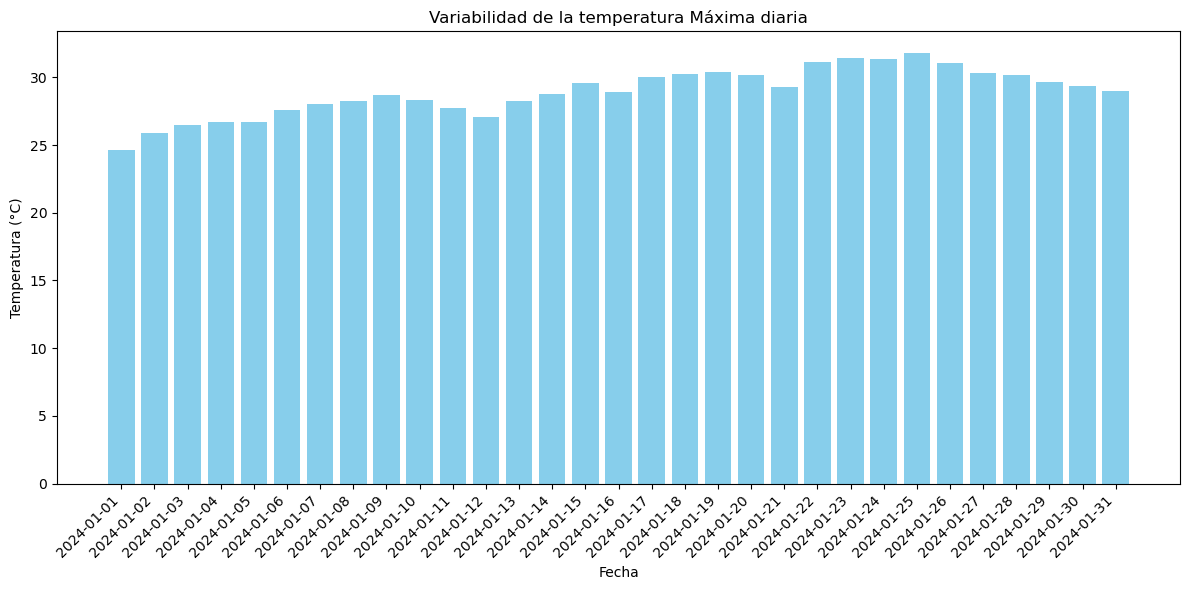

In [79]:
plot_temperature_max_variability(data)

**Temperatura Mínima**

* Periodo de: 01 de enero del 2024 al 31 de enero del 2024
* Rango: 30 días

In [81]:
parameters = "T2M_MIN"
longitude = -73.67297931826681
latitude = 6.009443405234052
start_date = "20240101"
end_date = "20240131"

data = get_nasa_power_data(parameters, longitude, latitude, start_date, end_date)
if data:
    print(data)


{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-73.67297931826681, 6.009443405234052, 1505.21]}, 'properties': {'parameter': {'T2M_MIN': {'20240101': 17.51, '20240102': 16.78, '20240103': 17.66, '20240104': 16.92, '20240105': 17.82, '20240106': 15.58, '20240107': 13.96, '20240108': 16.07, '20240109': 14.45, '20240110': 14.83, '20240111': 17.09, '20240112': 17.65, '20240113': 17.6, '20240114': 16.32, '20240115': 14.1, '20240116': 13.81, '20240117': 14.82, '20240118': 16.91, '20240119': 16.88, '20240120': 16.94, '20240121': 17.22, '20240122': 17.12, '20240123': 15.29, '20240124': 14.85, '20240125': 15.84, '20240126': 14.87, '20240127': 16.86, '20240128': 17.58, '20240129': 17.85, '20240130': 16.26, '20240131': 17.03}}}, 'header': {'title': 'NASA/POWER CERES/MERRA2 Native Resolution Daily Data', 'api': {'version': 'v2.5.9', 'name': 'POWER Daily API'}, 'sources': ['power'], 'fill_value': -999.0, 'start': '20240101', 'end': '20240131'}, 'messages': [], 'parameters': {'T2M

**Variabilidad de la Temperatura Mínima**

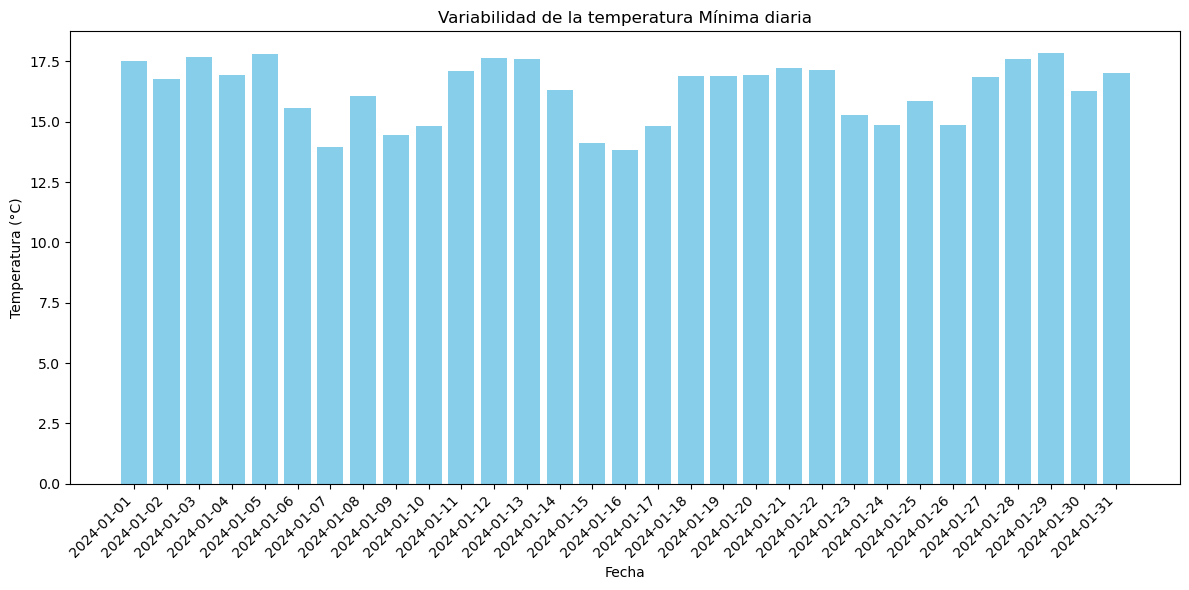

In [82]:
plot_temperature_min_variability(data)

___

#### Barbosa

**Temperatura Máxima**

* Periodo de: 01 de enero del 2024 al 31 de enero del 2024
* Rango: 30 días

In [86]:
parameters = "T2M_MAX"
longitude = -73.61375387195025
latitude = 5.930060249368353
start_date = "20240101"
end_date = "20240131"

data = get_nasa_power_data(parameters, longitude, latitude, start_date, end_date)
if data:
    print(data)


{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-73.61375387195025, 5.930060249368353, 1505.21]}, 'properties': {'parameter': {'T2M_MAX': {'20240101': 24.6, '20240102': 25.9, '20240103': 26.51, '20240104': 26.72, '20240105': 26.68, '20240106': 27.55, '20240107': 28.03, '20240108': 28.26, '20240109': 28.67, '20240110': 28.29, '20240111': 27.7, '20240112': 27.08, '20240113': 28.26, '20240114': 28.75, '20240115': 29.58, '20240116': 28.89, '20240117': 30.01, '20240118': 30.21, '20240119': 30.42, '20240120': 30.16, '20240121': 29.25, '20240122': 31.14, '20240123': 31.42, '20240124': 31.34, '20240125': 31.8, '20240126': 31.02, '20240127': 30.35, '20240128': 30.15, '20240129': 29.68, '20240130': 29.36, '20240131': 28.99}}}, 'header': {'title': 'NASA/POWER CERES/MERRA2 Native Resolution Daily Data', 'api': {'version': 'v2.5.9', 'name': 'POWER Daily API'}, 'sources': ['power'], 'fill_value': -999.0, 'start': '20240101', 'end': '20240131'}, 'messages': [], 'parameters': {'T2M_M

**Variabilidad de la Temperatura Máxima**

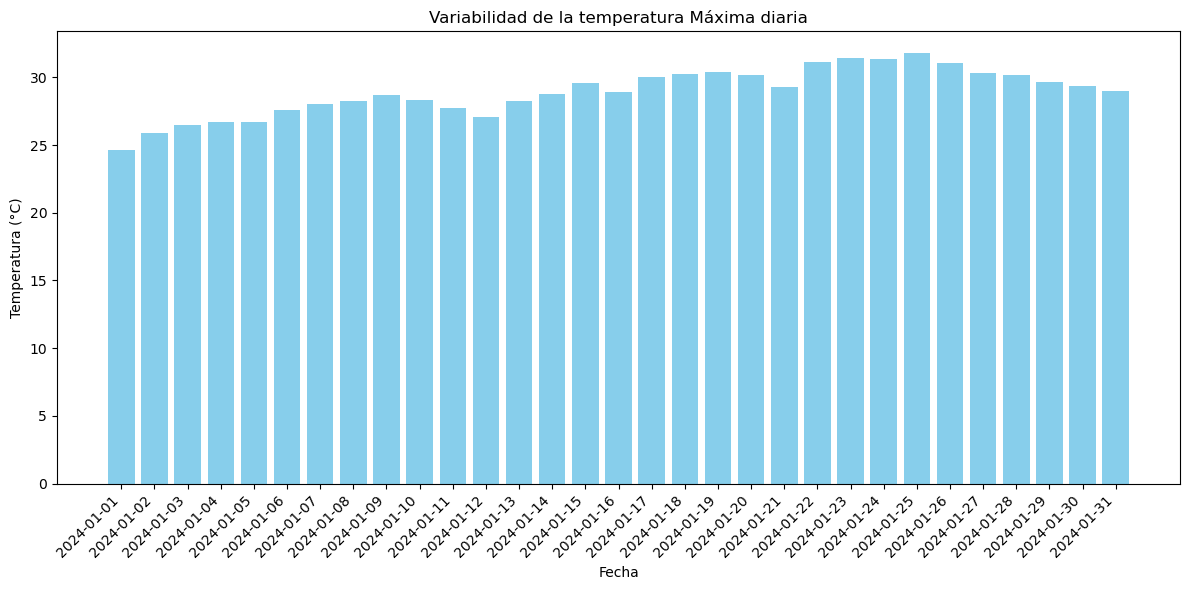

In [87]:
plot_temperature_max_variability(data)

**Temperatura Mínima**

* Periodo de: 01 de enero del 2024 al 31 de enero del 2024
* Rango: 30 días

In [88]:
parameters = "T2M_MIN"
longitude = -73.61375387195025
latitude = 5.930060249368353
start_date = "20240101"
end_date = "20240131"

data = get_nasa_power_data(parameters, longitude, latitude, start_date, end_date)
if data:
    print(data)


{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-73.61375387195025, 5.930060249368353, 1505.21]}, 'properties': {'parameter': {'T2M_MIN': {'20240101': 17.51, '20240102': 16.78, '20240103': 17.66, '20240104': 16.92, '20240105': 17.82, '20240106': 15.58, '20240107': 13.96, '20240108': 16.07, '20240109': 14.45, '20240110': 14.83, '20240111': 17.09, '20240112': 17.65, '20240113': 17.6, '20240114': 16.32, '20240115': 14.1, '20240116': 13.81, '20240117': 14.82, '20240118': 16.91, '20240119': 16.88, '20240120': 16.94, '20240121': 17.22, '20240122': 17.12, '20240123': 15.29, '20240124': 14.85, '20240125': 15.84, '20240126': 14.87, '20240127': 16.86, '20240128': 17.58, '20240129': 17.85, '20240130': 16.26, '20240131': 17.03}}}, 'header': {'title': 'NASA/POWER CERES/MERRA2 Native Resolution Daily Data', 'api': {'version': 'v2.5.9', 'name': 'POWER Daily API'}, 'sources': ['power'], 'fill_value': -999.0, 'start': '20240101', 'end': '20240131'}, 'messages': [], 'parameters': {'T2M

**Variabilidad de la Temperatura Mínima**

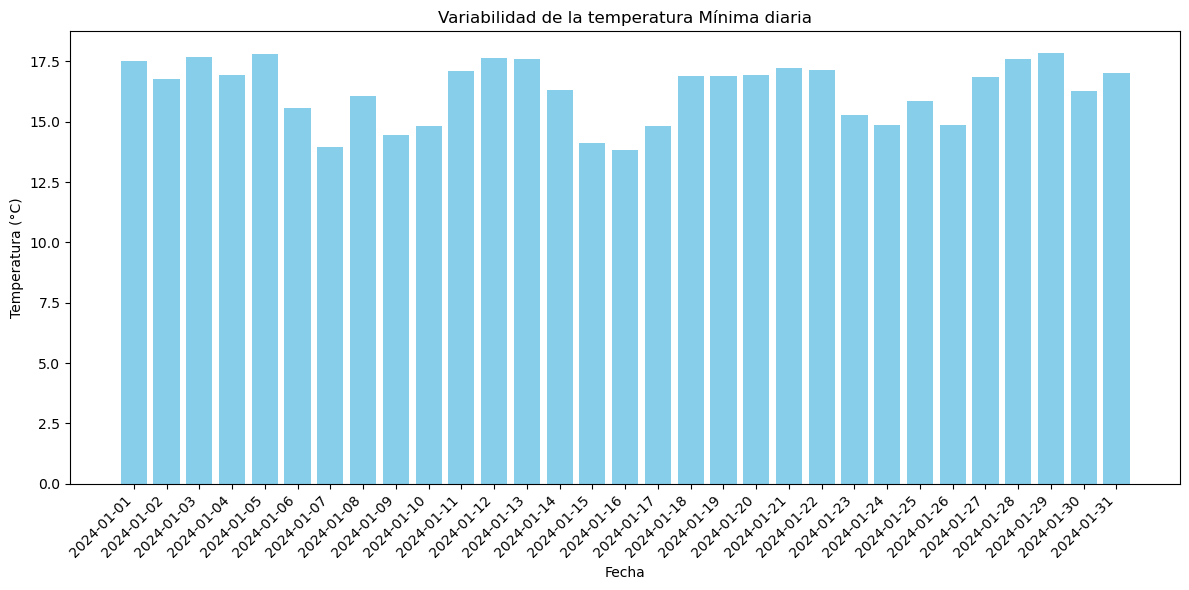

In [89]:
plot_temperature_min_variability(data)

___

#### Bolívar

**Temperatura Máxima**

* Periodo de: 01 de enero del 2024 al 31 de enero del 2024
* Rango: 30 días

In [92]:
parameters = "T2M_MAX"
longitude = -73.76978218077878
latitude = 5.995007056645676
start_date = "20240101"
end_date = "20240131"

data = get_nasa_power_data(parameters, longitude, latitude, start_date, end_date)
if data:
    print(data)


{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-73.76978218077878, 5.995007056645676, 1505.21]}, 'properties': {'parameter': {'T2M_MAX': {'20240101': 24.6, '20240102': 25.9, '20240103': 26.51, '20240104': 26.72, '20240105': 26.68, '20240106': 27.55, '20240107': 28.03, '20240108': 28.26, '20240109': 28.67, '20240110': 28.29, '20240111': 27.7, '20240112': 27.08, '20240113': 28.26, '20240114': 28.75, '20240115': 29.58, '20240116': 28.89, '20240117': 30.01, '20240118': 30.21, '20240119': 30.42, '20240120': 30.16, '20240121': 29.25, '20240122': 31.14, '20240123': 31.42, '20240124': 31.34, '20240125': 31.8, '20240126': 31.02, '20240127': 30.35, '20240128': 30.15, '20240129': 29.68, '20240130': 29.36, '20240131': 28.99}}}, 'header': {'title': 'NASA/POWER CERES/MERRA2 Native Resolution Daily Data', 'api': {'version': 'v2.5.9', 'name': 'POWER Daily API'}, 'sources': ['power'], 'fill_value': -999.0, 'start': '20240101', 'end': '20240131'}, 'messages': [], 'parameters': {'T2M_M

**Variabilidad de la Temperatura Máxima**

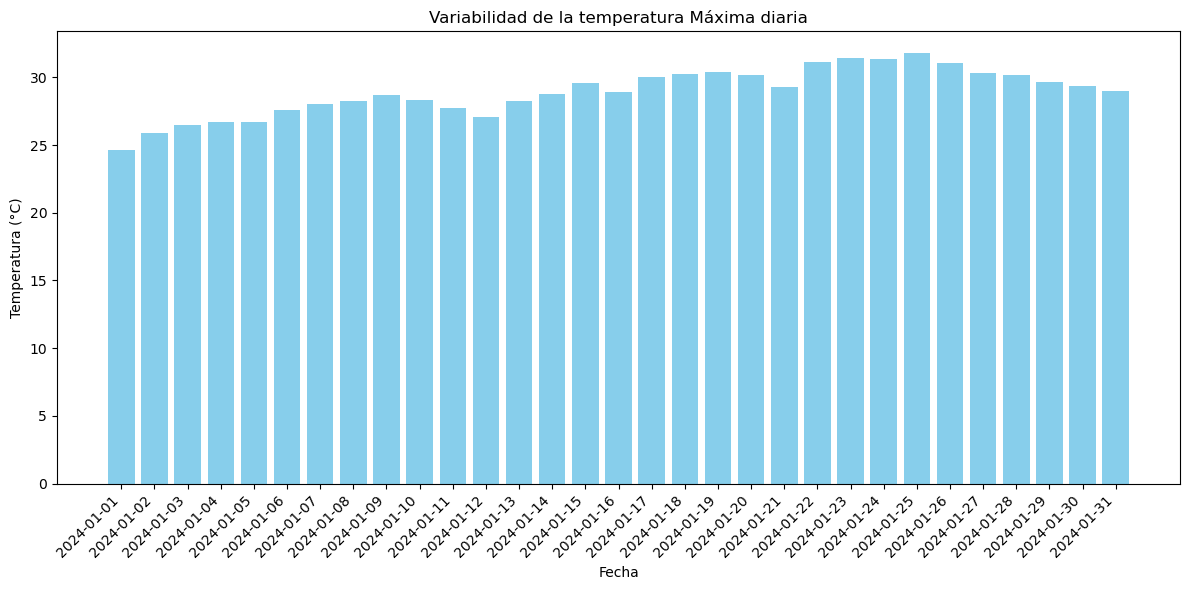

In [93]:
plot_temperature_max_variability(data)

**Temperatura Mínima**

* Periodo de: 01 de enero del 2024 al 31 de enero del 2024
* Rango: 30 días

In [94]:
parameters = "T2M_MIN"
longitude = -73.76978218077878
latitude = 5.995007056645676
start_date = "20240101"
end_date = "20240131"

data = get_nasa_power_data(parameters, longitude, latitude, start_date, end_date)
if data:
    print(data)


{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-73.76978218077878, 5.995007056645676, 1505.21]}, 'properties': {'parameter': {'T2M_MIN': {'20240101': 17.51, '20240102': 16.78, '20240103': 17.66, '20240104': 16.92, '20240105': 17.82, '20240106': 15.58, '20240107': 13.96, '20240108': 16.07, '20240109': 14.45, '20240110': 14.83, '20240111': 17.09, '20240112': 17.65, '20240113': 17.6, '20240114': 16.32, '20240115': 14.1, '20240116': 13.81, '20240117': 14.82, '20240118': 16.91, '20240119': 16.88, '20240120': 16.94, '20240121': 17.22, '20240122': 17.12, '20240123': 15.29, '20240124': 14.85, '20240125': 15.84, '20240126': 14.87, '20240127': 16.86, '20240128': 17.58, '20240129': 17.85, '20240130': 16.26, '20240131': 17.03}}}, 'header': {'title': 'NASA/POWER CERES/MERRA2 Native Resolution Daily Data', 'api': {'version': 'v2.5.9', 'name': 'POWER Daily API'}, 'sources': ['power'], 'fill_value': -999.0, 'start': '20240101', 'end': '20240131'}, 'messages': [], 'parameters': {'T2M

**Variabilidad de la Temperatura Mínima**

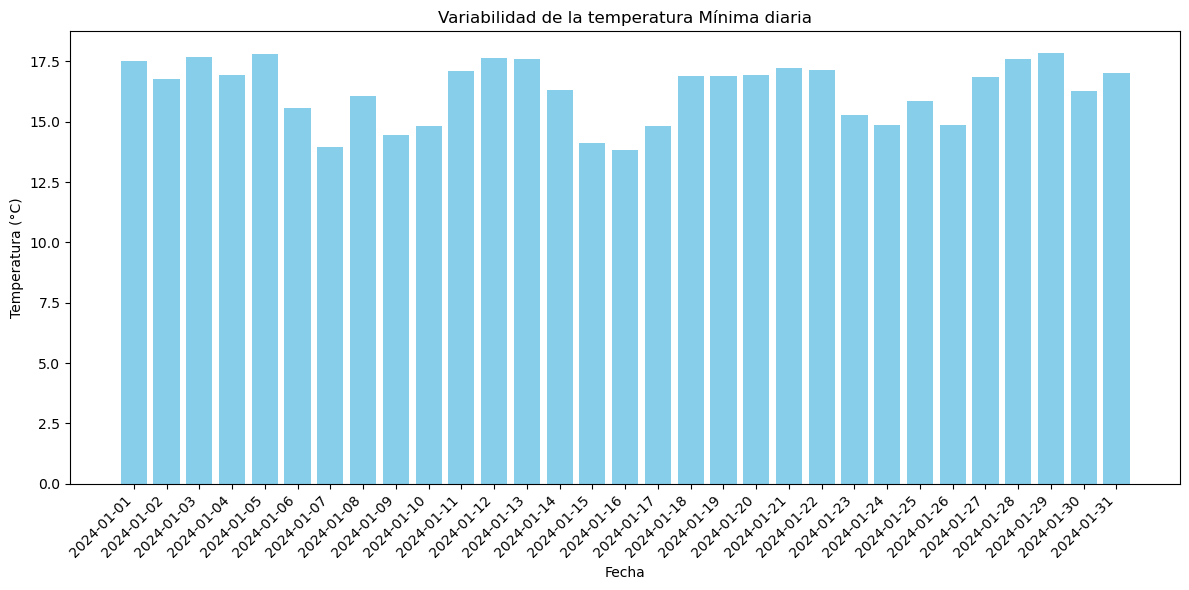

In [95]:
plot_temperature_min_variability(data)

___

#### Puente Nacional

**Temperatura Máxima**

* Periodo de: 01 de enero del 2024 al 31 de enero del 2024
* Rango: 30 días

In [96]:
parameters = "T2M_MAX"
longitude = -73.67803544736924
latitude = 5.8771562440629594
start_date = "20240101"
end_date = "20240131"

data = get_nasa_power_data(parameters, longitude, latitude, start_date, end_date)
if data:
    print(data)


{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-73.67803544736924, 5.8771562440629594, 1505.21]}, 'properties': {'parameter': {'T2M_MAX': {'20240101': 24.6, '20240102': 25.9, '20240103': 26.51, '20240104': 26.72, '20240105': 26.68, '20240106': 27.55, '20240107': 28.03, '20240108': 28.26, '20240109': 28.67, '20240110': 28.29, '20240111': 27.7, '20240112': 27.08, '20240113': 28.26, '20240114': 28.75, '20240115': 29.58, '20240116': 28.89, '20240117': 30.01, '20240118': 30.21, '20240119': 30.42, '20240120': 30.16, '20240121': 29.25, '20240122': 31.14, '20240123': 31.42, '20240124': 31.34, '20240125': 31.8, '20240126': 31.02, '20240127': 30.35, '20240128': 30.15, '20240129': 29.68, '20240130': 29.36, '20240131': 28.99}}}, 'header': {'title': 'NASA/POWER CERES/MERRA2 Native Resolution Daily Data', 'api': {'version': 'v2.5.9', 'name': 'POWER Daily API'}, 'sources': ['power'], 'fill_value': -999.0, 'start': '20240101', 'end': '20240131'}, 'messages': [], 'parameters': {'T2M_

**Variabilidad de la Temperatura Máxima**

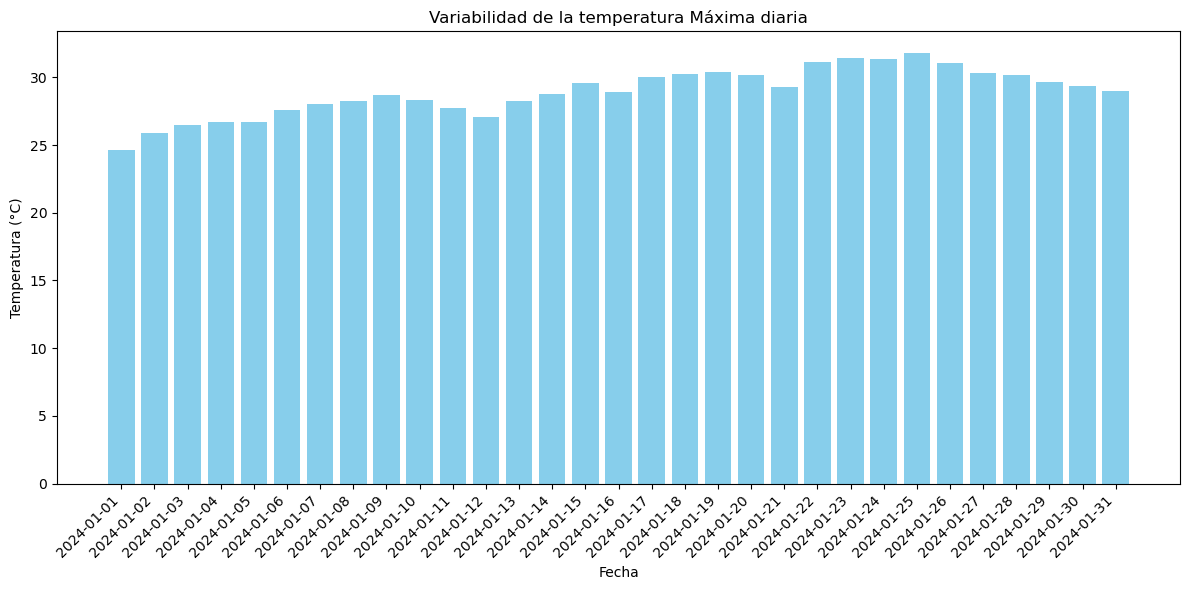

In [97]:
plot_temperature_max_variability(data)

**Temperatura Mínima**

* Periodo de: 01 de enero del 2024 al 31 de enero del 2024
* Rango: 30 días

In [98]:
parameters = "T2M_MIN"
longitude = -73.67803544736924
latitude = 5.8771562440629594
start_date = "20240101"
end_date = "20240131"

data = get_nasa_power_data(parameters, longitude, latitude, start_date, end_date)
if data:
    print(data)


{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-73.67803544736924, 5.8771562440629594, 1505.21]}, 'properties': {'parameter': {'T2M_MIN': {'20240101': 17.51, '20240102': 16.78, '20240103': 17.66, '20240104': 16.92, '20240105': 17.82, '20240106': 15.58, '20240107': 13.96, '20240108': 16.07, '20240109': 14.45, '20240110': 14.83, '20240111': 17.09, '20240112': 17.65, '20240113': 17.6, '20240114': 16.32, '20240115': 14.1, '20240116': 13.81, '20240117': 14.82, '20240118': 16.91, '20240119': 16.88, '20240120': 16.94, '20240121': 17.22, '20240122': 17.12, '20240123': 15.29, '20240124': 14.85, '20240125': 15.84, '20240126': 14.87, '20240127': 16.86, '20240128': 17.58, '20240129': 17.85, '20240130': 16.26, '20240131': 17.03}}}, 'header': {'title': 'NASA/POWER CERES/MERRA2 Native Resolution Daily Data', 'api': {'version': 'v2.5.9', 'name': 'POWER Daily API'}, 'sources': ['power'], 'fill_value': -999.0, 'start': '20240101', 'end': '20240131'}, 'messages': [], 'parameters': {'T2

**Variabilidad de la Temperatura Mínima**

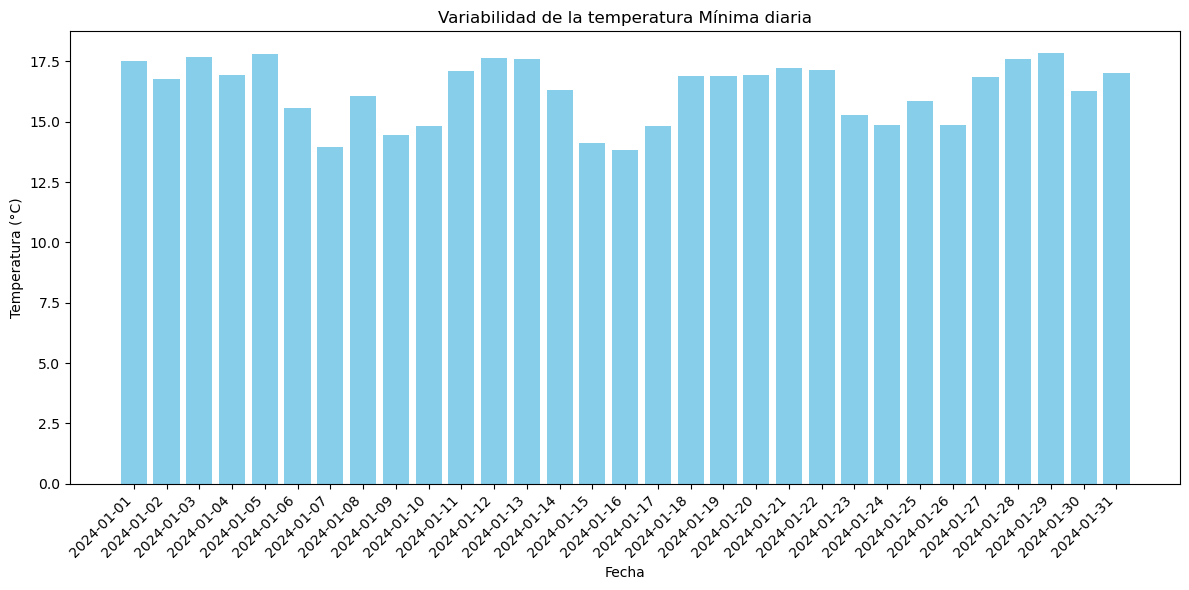

In [99]:
plot_temperature_min_variability(data)

___

#### Jesús María

**Temperatura Máxima**

* Periodo de: 01 de enero del 2024 al 31 de enero del 2024
* Rango: 30 días

In [100]:
parameters = "T2M_MAX"
longitude = -73.78256678517812
latitude = 5.876607199385987
start_date = "20240101"
end_date = "20240131"

data = get_nasa_power_data(parameters, longitude, latitude, start_date, end_date)
if data:
    print(data)


{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-73.78256678517812, 5.876607199385987, 1505.21]}, 'properties': {'parameter': {'T2M_MAX': {'20240101': 24.6, '20240102': 25.9, '20240103': 26.51, '20240104': 26.72, '20240105': 26.68, '20240106': 27.55, '20240107': 28.03, '20240108': 28.26, '20240109': 28.67, '20240110': 28.29, '20240111': 27.7, '20240112': 27.08, '20240113': 28.26, '20240114': 28.75, '20240115': 29.58, '20240116': 28.89, '20240117': 30.01, '20240118': 30.21, '20240119': 30.42, '20240120': 30.16, '20240121': 29.25, '20240122': 31.14, '20240123': 31.42, '20240124': 31.34, '20240125': 31.8, '20240126': 31.02, '20240127': 30.35, '20240128': 30.15, '20240129': 29.68, '20240130': 29.36, '20240131': 28.99}}}, 'header': {'title': 'NASA/POWER CERES/MERRA2 Native Resolution Daily Data', 'api': {'version': 'v2.5.9', 'name': 'POWER Daily API'}, 'sources': ['power'], 'fill_value': -999.0, 'start': '20240101', 'end': '20240131'}, 'messages': [], 'parameters': {'T2M_M

**Variabilidad de la Temperatura Máxima**

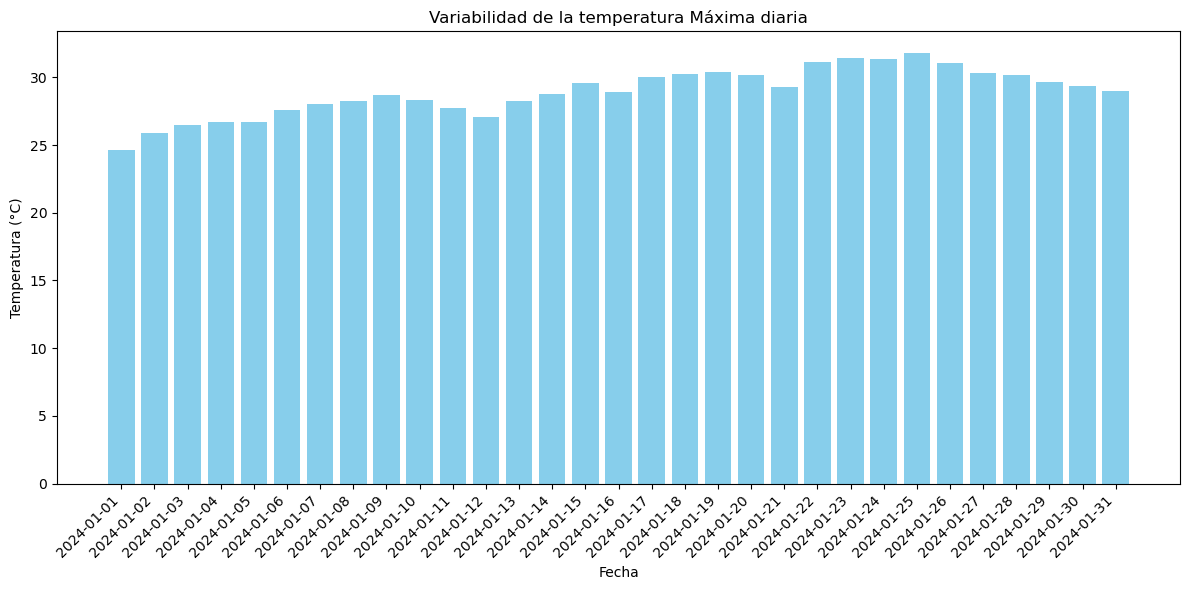

In [101]:
plot_temperature_max_variability(data)

**Temperatura Mínima**

* Periodo de: 01 de enero del 2024 al 31 de enero del 2024
* Rango: 30 días

In [102]:
parameters = "T2M_MIN"
longitude = -73.78256678517812
latitude = 5.876607199385987
start_date = "20240101"
end_date = "20240131"

data = get_nasa_power_data(parameters, longitude, latitude, start_date, end_date)
if data:
    print(data)


{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-73.78256678517812, 5.876607199385987, 1505.21]}, 'properties': {'parameter': {'T2M_MIN': {'20240101': 17.51, '20240102': 16.78, '20240103': 17.66, '20240104': 16.92, '20240105': 17.82, '20240106': 15.58, '20240107': 13.96, '20240108': 16.07, '20240109': 14.45, '20240110': 14.83, '20240111': 17.09, '20240112': 17.65, '20240113': 17.6, '20240114': 16.32, '20240115': 14.1, '20240116': 13.81, '20240117': 14.82, '20240118': 16.91, '20240119': 16.88, '20240120': 16.94, '20240121': 17.22, '20240122': 17.12, '20240123': 15.29, '20240124': 14.85, '20240125': 15.84, '20240126': 14.87, '20240127': 16.86, '20240128': 17.58, '20240129': 17.85, '20240130': 16.26, '20240131': 17.03}}}, 'header': {'title': 'NASA/POWER CERES/MERRA2 Native Resolution Daily Data', 'api': {'version': 'v2.5.9', 'name': 'POWER Daily API'}, 'sources': ['power'], 'fill_value': -999.0, 'start': '20240101', 'end': '20240131'}, 'messages': [], 'parameters': {'T2M

**Variabilidad de la Temperatura Mínima**

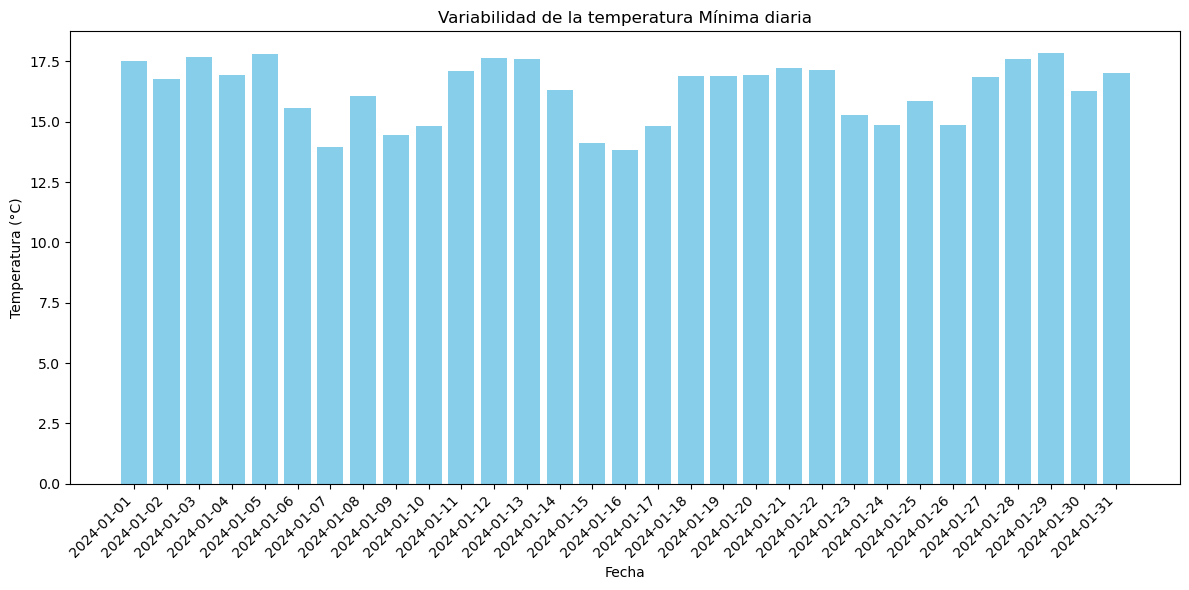

In [103]:
plot_temperature_min_variability(data)

___

#### Guavatá

**Temperatura Máxima**

* Periodo de: 01 de enero del 2024 al 31 de enero del 2024
* Rango: 30 días

In [104]:
parameters = "T2M_MAX"
longitude = -73.70093027194979
latitude = 5.955053036497503
start_date = "20240101"
end_date = "20240131"

data = get_nasa_power_data(parameters, longitude, latitude, start_date, end_date)
if data:
    print(data)


{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-73.70093027194979, 5.955053036497503, 1505.21]}, 'properties': {'parameter': {'T2M_MAX': {'20240101': 24.6, '20240102': 25.9, '20240103': 26.51, '20240104': 26.72, '20240105': 26.68, '20240106': 27.55, '20240107': 28.03, '20240108': 28.26, '20240109': 28.67, '20240110': 28.29, '20240111': 27.7, '20240112': 27.08, '20240113': 28.26, '20240114': 28.75, '20240115': 29.58, '20240116': 28.89, '20240117': 30.01, '20240118': 30.21, '20240119': 30.42, '20240120': 30.16, '20240121': 29.25, '20240122': 31.14, '20240123': 31.42, '20240124': 31.34, '20240125': 31.8, '20240126': 31.02, '20240127': 30.35, '20240128': 30.15, '20240129': 29.68, '20240130': 29.36, '20240131': 28.99}}}, 'header': {'title': 'NASA/POWER CERES/MERRA2 Native Resolution Daily Data', 'api': {'version': 'v2.5.9', 'name': 'POWER Daily API'}, 'sources': ['power'], 'fill_value': -999.0, 'start': '20240101', 'end': '20240131'}, 'messages': [], 'parameters': {'T2M_M

**Variabilidad de la Temperatura Máxima**

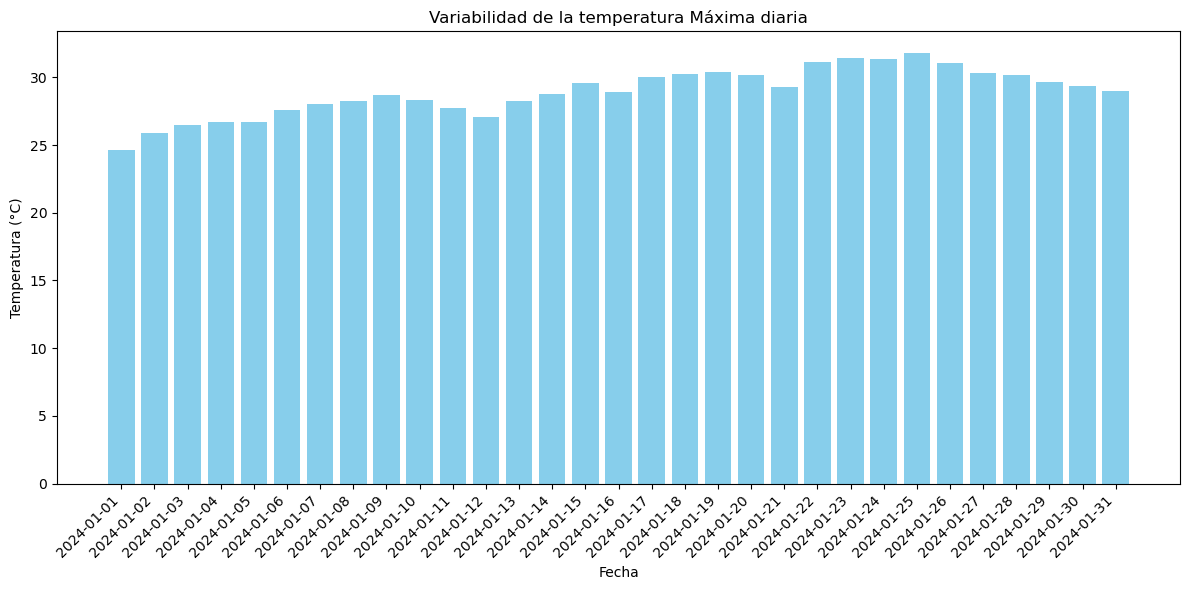

In [105]:
plot_temperature_max_variability(data)

**Temperatura Mínima**

* Periodo de: 01 de enero del 2024 al 31 de enero del 2024
* Rango: 30 días

In [106]:
parameters = "T2M_MIN"
longitude = -73.70093027194979
latitude = 5.955053036497503
start_date = "20240101"
end_date = "20240131"

data = get_nasa_power_data(parameters, longitude, latitude, start_date, end_date)
if data:
    print(data)


{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-73.70093027194979, 5.955053036497503, 1505.21]}, 'properties': {'parameter': {'T2M_MIN': {'20240101': 17.51, '20240102': 16.78, '20240103': 17.66, '20240104': 16.92, '20240105': 17.82, '20240106': 15.58, '20240107': 13.96, '20240108': 16.07, '20240109': 14.45, '20240110': 14.83, '20240111': 17.09, '20240112': 17.65, '20240113': 17.6, '20240114': 16.32, '20240115': 14.1, '20240116': 13.81, '20240117': 14.82, '20240118': 16.91, '20240119': 16.88, '20240120': 16.94, '20240121': 17.22, '20240122': 17.12, '20240123': 15.29, '20240124': 14.85, '20240125': 15.84, '20240126': 14.87, '20240127': 16.86, '20240128': 17.58, '20240129': 17.85, '20240130': 16.26, '20240131': 17.03}}}, 'header': {'title': 'NASA/POWER CERES/MERRA2 Native Resolution Daily Data', 'api': {'version': 'v2.5.9', 'name': 'POWER Daily API'}, 'sources': ['power'], 'fill_value': -999.0, 'start': '20240101', 'end': '20240131'}, 'messages': [], 'parameters': {'T2M

**Variabilidad de la Temperatura Mínima**

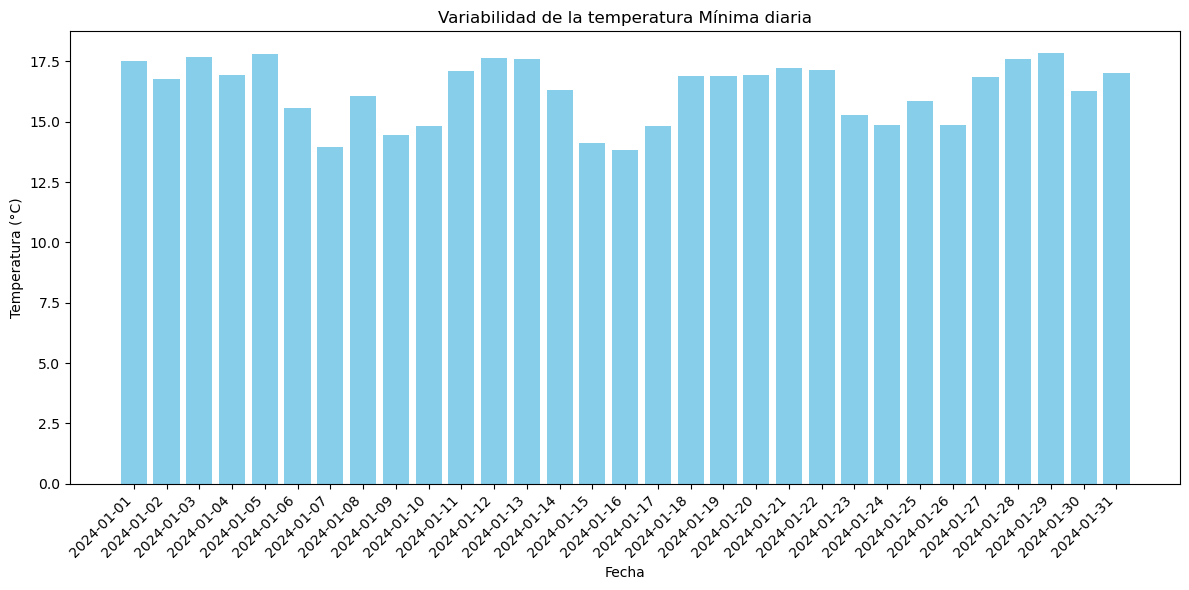

In [107]:
plot_temperature_min_variability(data)

## 3. Seleccionar puntos estratégicos para la instalación de nuevas estaciones meteorológicas.

Tras un análisis exhaustivo de los históricos climáticos y el catálogo de estaciones del IDEAM (Instituto de Hidrología, Meteorología y Estudios Ambientales de Colombia), se ha decidido instalar cuatro estaciones meteorológicas en los municipios de Vélez, Barbosa, Puente Nacional y Jesús María. Esta decisión se fundamenta en las siguientes razones:

**Distribución Geográfica y Cobertura:**

* Vélez: Esta área es crucial por su ubicación geográfica y su relevancia en la producción agrícola de la región. Contar con una estación meteorológica aquí permitirá obtener datos precisos que beneficiarán a los agricultores locales.
* Barbosa: Similarmente, Barbosa es un punto estratégico para monitorear las condiciones climáticas y proveer datos esenciales para la planificación agrícola.
* Puente Nacional: Este municipio también juega un papel importante en la actividad agrícola de la región. Una estación aquí permitirá mejorar las predicciones y gestionar mejor los recursos.
* Jesús María: Completa la distribución geográfica de manera equilibrada, asegurando que se cubra una amplia área de interés.

**Disponibilidad de Estaciones:**

Actualmente, solo se dispone de cuatro estaciones meteorológicas. Por lo tanto, es esencial ubicarlas en lugares estratégicos que maximicen su utilidad y cobertura regional.

**Relevancia Agrícola:**

En todos estos municipios, el cultivo de la guayaba es predominante. La instalación de estaciones meteorológicas ayudará a los agricultores a tomar decisiones informadas sobre el riego, la fertilización y la protección contra plagas y enfermedades, basándose en datos climáticos precisos y en tiempo real.

**Beneficios para el Desarrollo Local:**

Las estaciones meteorológicas proporcionarán datos cruciales que no solo beneficiarán a los agricultores individuales, sino que también contribuirán a la investigación y desarrollo agrícola a nivel regional. Esto, a su vez, puede llevar a mejoras en las prácticas agrícolas y a un aumento en la productividad y sostenibilidad de los cultivos.

### 3.1. Zonificación de áreas sugeridas para la instalación de las estaciones meteorológicas.

#### Vélez

In [8]:
# Coordenadas del centro del círculo (por ejemplo, Vélez, Colombia)
latitude = 5.994365519442738
longitude = -73.67760653215372

# Crear un mapa centrado en las coordenadas especificadas
mapa = folium.Map(location=[latitude, longitude], zoom_start=13)

# Agregar un círculo con un radio de 3 km (3000 metros)
folium.Circle(
    location=(latitude, longitude),
    radius=3000,  # radio en metros
    color='red',
    fill=True,
    fill_color='red',
    fill_opacity=0.2
).add_to(mapa)

# Mostrar el mapa
mapa.save('mapa_con_circulo_velez.html')
mapa

#### Barbosa

In [9]:
# Coordenadas del centro del círculo
latitude = 5.938652802489571
longitude = -73.62986930161752

# Crear un mapa centrado en las coordenadas especificadas
mapa = folium.Map(location=[latitude, longitude], zoom_start=13)

# Agregar un círculo con un radio de 3 km (3000 metros)
folium.Circle(
    location=(latitude, longitude),
    radius=3000,  # radio en metros
    color='red',
    fill=True,
    fill_color='red',
    fill_opacity=0.2
).add_to(mapa)

# Mostrar el mapa
mapa.save('mapa_con_circulo_Barbosa.html')
mapa

#### Puente Nacional

In [10]:
# Coordenadas del centro del círculo
latitude = 5.8832121196717395
longitude = -73.69189400958362

# Crear un mapa centrado en las coordenadas especificadas
mapa = folium.Map(location=[latitude, longitude], zoom_start=13)

# Agregar un círculo con un radio de 3 km (3000 metros)
folium.Circle(
    location=(latitude, longitude),
    radius=3000,  # radio en metros
    color='red',
    fill=True,
    fill_color='red',
    fill_opacity=0.2
).add_to(mapa)

# Mostrar el mapa
mapa.save('mapa_con_circulo_puente_nacional.html')
mapa

#### Jesús María

In [11]:
# Coordenadas del centro del círculo
latitude = 5.87624519973572
longitude = -73.77263584170018

# Crear un mapa centrado en las coordenadas especificadas
mapa = folium.Map(location=[latitude, longitude], zoom_start=13)

# Agregar un círculo con un radio de 3 km (3000 metros)
folium.Circle(
    location=(latitude, longitude),
    radius=3000,  # radio en metros
    color='red',
    fill=True,
    fill_color='red',
    fill_opacity=0.2
).add_to(mapa)

# Mostrar el mapa
mapa.save('mapa_con_circulo_jesus_maria.html')
mapa

## 4. Elaborar un plan de implementación para la instalación de las estaciones meteorológicas.

El objetivo de este plan es guiar la instalación de cuatro estaciones meteorológicas en los municipios de Vélez, Barbosa, Puente Nacional y Jesús María, asegurando que se maximice la recolección de datos climáticos y se proteja la inversión mediante medidas de seguridad y colaboración con los productores locales.

**Criterios de Selección de Ubicación**

1. Diversificación de Cultivos:

* Requerimiento: Una de las estaciones debe estar ubicada en un área con un cultivo diferente al de guayaba.
* Acción: El equipo de trabajo seleccionará el cultivo alternativo más adecuado, considerando factores como la relevancia económica, las condiciones climáticas y la representatividad de la región.

2. Accesibilidad:

* Requerimiento: Las estaciones deben ser de fácil acceso, preferiblemente ubicadas cerca de caminos principales o secundarios.
* Acción: Seleccionar sitios de instalación que tengan acceso vehicular, facilitando el mantenimiento y la supervisión de las estaciones meteorológicas.

3. Seguridad y Protección:

* Requerimiento: Las estaciones deben ser instaladas en la residencia del productor o dueño del cultivo para evitar posibles daños o robos.
* Acción: Identificar y seleccionar productores que estén dispuestos a alojar las estaciones en sus propiedades, asegurando que las ubicaciones ofrezcan un nivel adecuado de seguridad.

4. Colaboración del Productor:

* Requerimiento: El productor o dueño del cultivo debe estar dispuesto a colaborar con el proyecto, proporcionando información sobre el manejo de su cultivo con la garantía de confidencialidad.
* Acción: Realizar reuniones informativas con los productores para explicar los beneficios del proyecto y asegurar su cooperación. Firmar acuerdos de colaboración que incluyan cláusulas de confidencialidad para proteger la información proporcionada por los productores.

**Pasos del Plan de Implementación**

1. Identificación y Selección de Productores:

* Realizar un censo de productores en los municipios seleccionados.
* Evaluar la disposición de los productores a participar en el proyecto y sus ubicaciones en relación con los caminos principales y secundarios.

2. Evaluación de Sitios de Instalación:

* Visitar los sitios propuestos para verificar la accesibilidad y las condiciones de seguridad.
* Confirmar la existencia de un cultivo diferente al de guayaba en uno de los sitios seleccionados.

3. Acuerdos de Colaboración:

* Negociar y firmar acuerdos de colaboración con los productores seleccionados, incluyendo compromisos de mantenimiento de las estaciones y la provisión de información confidencial.

4. Instalación de las Estaciones:

* Coordinar la instalación de las estaciones meteorológicas, asegurando que se cumplan con las especificaciones técnicas y las ubicaciones acordadas.
* Capacitar a los productores en el uso y mantenimiento básico de las estaciones.

5. Monitoreo y Mantenimiento:

* Establecer un calendario de monitoreo y mantenimiento regular para asegurar el funcionamiento óptimo de las estaciones.
* Asignar un equipo técnico responsable del soporte y la supervisión continua de las estaciones.

**Beneficios Esperados**
* Mejora en la Recolección de Datos Climáticos: Datos precisos y en tiempo real que beneficiarán a los agricultores locales y a la investigación agronómica.
* Seguridad y Protección: Ubicaciones seguras que minimizan el riesgo de daños o robos de las estaciones.
* Colaboración Productiva: Relaciones sólidas con los productores locales, garantizando el éxito del proyecto y la confidencialidad de la información.

## Conclusiones

El análisis detallado de los históricos climáticos y el catálogo de estaciones del IDEAM ha permitido identificar estratégicamente los municipios de Vélez, Barbosa, Puente Nacional y Jesús María como los lugares óptimos para la instalación de cuatro nuevas estaciones meteorológicas. Este proceso se ha fundamentado en criterios técnicos y logísticos rigurosos, asegurando una cobertura adecuada y el máximo beneficio para la región.

La implementación de estas estaciones meteorológicas no solo incrementará la precisión y disponibilidad de los datos climáticos en áreas clave, sino que también apoyará la investigación agrícola, proporcionando información vital para el manejo eficiente de los cultivos. La diversificación, con al menos una estación en un cultivo distinto a la guayaba, enriquecerá aún más la base de datos climáticos, permitiendo comparaciones y estudios más amplios que beneficien a diferentes tipos de cultivos.

La selección de ubicaciones accesibles, cercanas a caminos principales y secundarios, garantizará que las estaciones puedan ser mantenidas y supervisadas con facilidad, reduciendo costos y tiempos de intervención. Además, al instalar las estaciones en propiedades de productores locales, se minimiza el riesgo de vandalismo y robos, asegurando la continuidad de la recolección de datos.

La colaboración con los productores locales es un componente esencial de este proyecto. Al alojar las estaciones en sus propiedades y obtener su compromiso de proporcionar datos sobre el manejo de los cultivos, se fomenta una relación de cooperación y confianza. Este enfoque no solo garantiza la seguridad de las estaciones, sino que también promueve el uso práctico de los datos recolectados, beneficiando directamente a la comunidad agrícola.

El éxito de esta iniciativa dependerá de la implementación efectiva y del mantenimiento continuo de las estaciones meteorológicas. El plan detallado de implementación, que incluye la identificación de productores colaboradores, la evaluación de sitios, la firma de acuerdos de colaboración, y el establecimiento de un calendario de monitoreo y mantenimiento, proporciona una hoja de ruta clara para alcanzar estos objetivos.